# LOAD THE IMPORTANT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# LOAD THE DATASETS

In [3]:
#Load the day dataset
df1 =pd.read_csv('day.csv')

In [4]:
#Check the first five rows
df1.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01/01/2011       1   0     1        0        6           0           2   
1  02/01/2011       1   0     1        0        0           0           2   
2  03/01/2011       1   0     1        0        1           1           1   
3  04/01/2011       1   0     1        0        2           1           1   
4  05/01/2011       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [5]:
# Check the last five rows
df1.tail()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
726  27/12/2012       1   1    12        0        4           1           2   
727  28/12/2012       1   1    12        0        5           1           2   
728  29/12/2012       1   1    12        0        6           0           2   
729  30/12/2012       1   1    12        0        0           0           1   
730  31/12/2012       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  casual  registered   cnt  
726  0.254167  0.226642  0.652917   0.350133     247        1867  2114  
727  0.253333  0.255046  0.590000   0.155471     644        2451  3095  
728  0.253333  0.242400  0.752917   0.124383     159        1182  1341  
729  0.255833  0.231700  0.483333   0.350754     364        1432  1796  
730  0.215833  0.223487  0.577500   0.154846     439        2290  2729

# EXPLORATORY DATA ANALYSIS

In [6]:
#Check the data type information of the variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [7]:
# More on dataset information
print ("Number of rows in the dataset  : " ,df1.shape[0])
print ("Number of Columns in the dataset : " ,df1.shape[1])
print ("Features Names : \n" ,df1.columns.tolist())
print ("Missing values :  ", df1.isnull().sum())
print ("Unique values :  \n",df1.nunique())

Number of rows in the dataset  :  731
Number of Columns in the dataset :  15
Features Names : 
 ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Missing values :   dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Unique values :  
 dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [8]:
# Descriptive statistic summary
df1.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%      1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      2.000000    0.655417    0.608602    0.730209    0.233214   
max      3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

# Data Cleaning and manipulation

In [9]:
# Tranform the date column to date range with day frequency
df1['dteday'] = pd.date_range(start=df1['dteday'].iloc[0], end=df1['dteday'].iloc[730], freq='D')

In [10]:
# Set the index to date
df1.set_index('dteday', inplace =True)

In [11]:
df1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit  \
dteday                                                                   
2011-01-01       1   0     1        0        6           0           2   
2011-01-02       1   0     1        0        0           0           2   
2011-01-03       1   0     1        0        1           1           1   
2011-01-04       1   0     1        0        2           1           1   
2011-01-05       1   0     1        0        3           1           1   

                temp     atemp       hum  windspeed  casual  registered   cnt  
dteday                                                                         
2011-01-01  0.344167  0.363625  0.805833   0.160446     331         654   985  
2011-01-02  0.363478  0.353739  0.696087   0.248539     131         670   801  
2011-01-03  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
2011-01-04  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
2011-01-05  0.226957  0.229270  0.436957   0.186900      82        1518  1600

# DATE VISUALIZATION

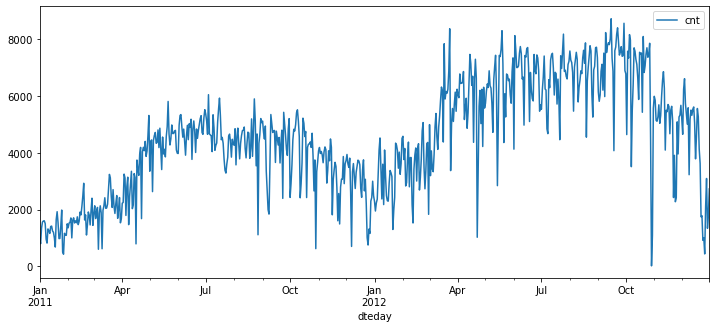

In [12]:
# Visualise the number of rented bikes over time
df1['cnt'].plot(kind='line',figsize =(12,5),legend =True);


In [13]:
# Visualise the number of rented bikes over time
import plotly.express as px
fig =px.line(df1, x =df1.index, y='cnt')
fig.show()

In [14]:
#Season impact on Bike Sharing System
df1_season = df1[['season','cnt']]

In [15]:
# Encoding the categorical features using the map function 
df1_season['season'] =df1_season['season'].map({1:'Winter', 2:'Spring',3:'Summer',4:'Autum'})

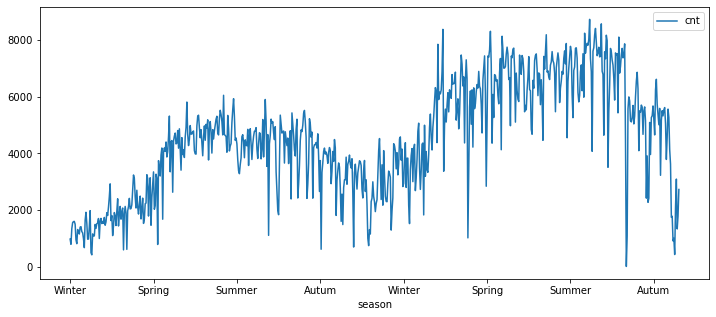

In [16]:
#Plot the number of rented bikes by season
df1_season.plot(kind ='line',x='season',y ='cnt',figsize =(12,5), legend=True);

In [17]:
#Weather impact on Bike Sharing System
df1_weather = df1[['temp','atemp','hum','windspeed','cnt']]

In [18]:
df1_weather.head()

temp     atemp       hum  windspeed   cnt
dteday                                                   
2011-01-01  0.344167  0.363625  0.805833   0.160446   985
2011-01-02  0.363478  0.353739  0.696087   0.248539   801
2011-01-03  0.196364  0.189405  0.437273   0.248309  1349
2011-01-04  0.200000  0.212122  0.590435   0.160296  1562
2011-01-05  0.226957  0.229270  0.436957   0.186900  1600

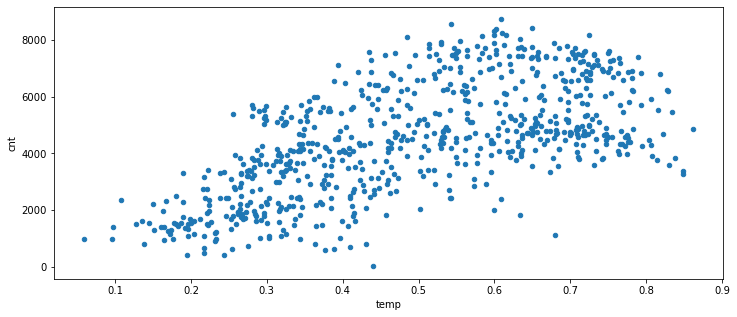

In [19]:
# Impact of temperature on  the number of rented bikes
df1_temp =df1_weather[['temp','cnt']]
df1_temp.plot(kind ='scatter',x='temp',y ='cnt',figsize=(12,5));

In [20]:
# Create a trendline for the temperature scatter plot
px.scatter(df1_temp,x='temp',y='cnt',trendline ='lowess')

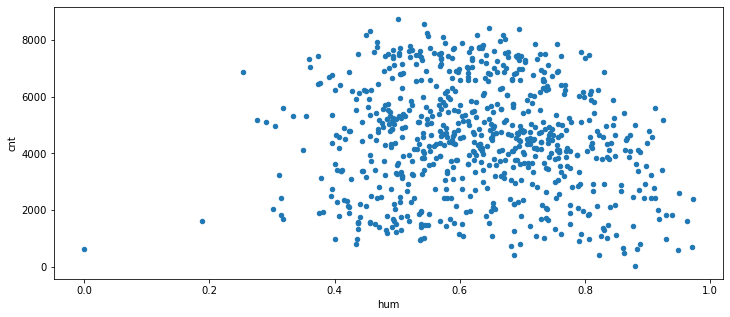

In [21]:
# Impact of humidity on  the number of rented bikes
df1_hum =df1_weather[['hum','cnt']]
df1_hum.plot(kind ='scatter',x='hum',y ='cnt',figsize=(12,5));

In [22]:
# Create a trendline for the humidity scatter plot
px.scatter(df1_hum,x='hum',y='cnt',trendline ='lowess')

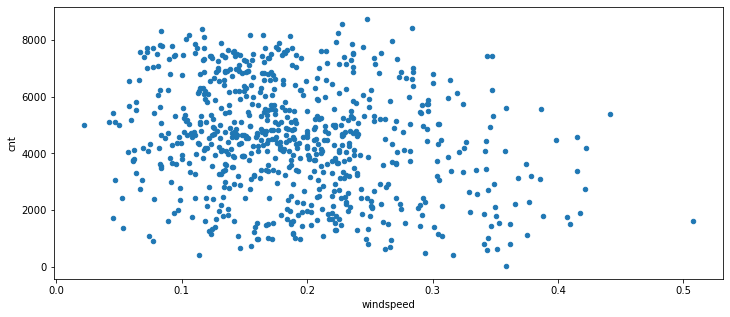

In [23]:
# Impact of windspeed on  the number of rented bikes
df1_wind =df1_weather[['windspeed','cnt']]
df1_wind.plot(kind ='scatter',x='windspeed',y ='cnt',figsize=(12,5));

In [24]:
# Create trend line for the windspeed scatter plot
px.scatter(df1_wind,x='windspeed',y='cnt',trendline ='lowess')

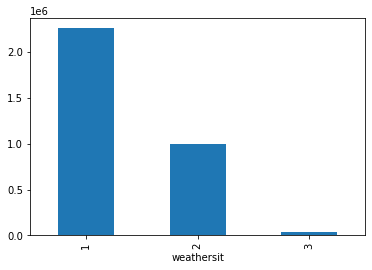

In [25]:
#Create a bar chart bike usage based on weathersit
bike_rent_weathersit=df1['cnt'].groupby([df1.weathersit]).sum()
bike_rent_weathersit.plot(kind='bar');

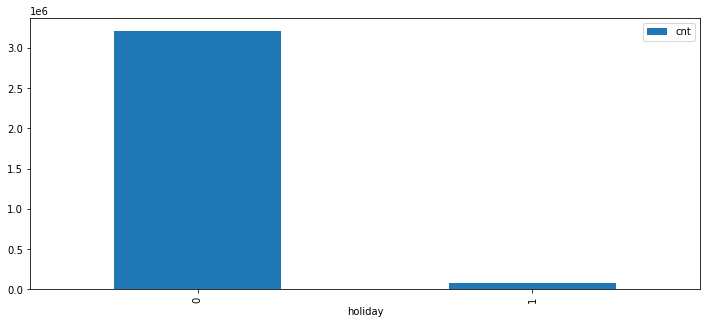

In [26]:
#Create a bar chart bike usage on holiday
bike_rent_hols = df1['cnt'].groupby([df1.holiday]).sum()
bike_rent_hols.plot(kind ='bar',figsize=(12,5),legend =True);

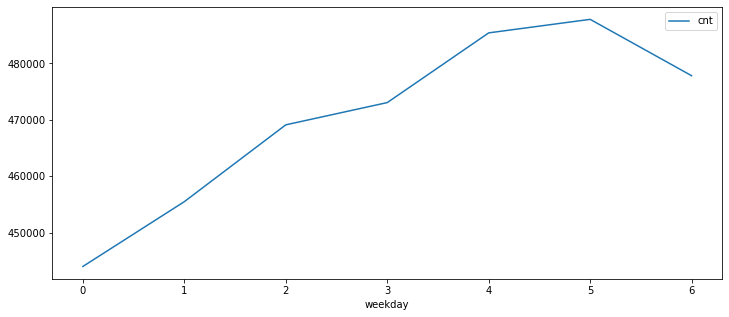

In [27]:
#Create a bar chart bike usage on weekday
bike_rent_weekday = df1['cnt'].groupby([df1.weekday]).sum()
bike_rent_weekday.plot(kind ='line',figsize=(12,5),legend =True);

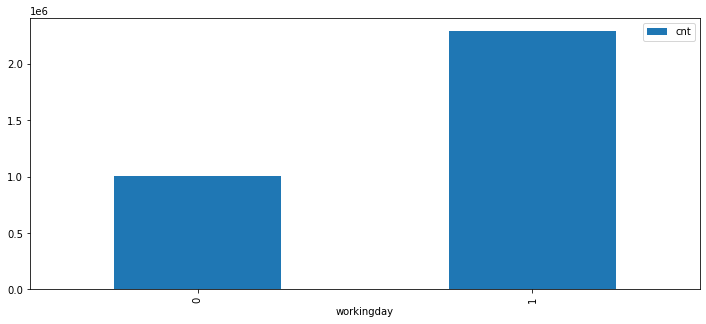

In [28]:
#Create a bar chart bike usage on workingday
bike_rent_workingday = df1['cnt'].groupby([df1.workingday]).sum()
bike_rent_workingday.plot(kind ='bar',figsize=(12,5),legend =True);

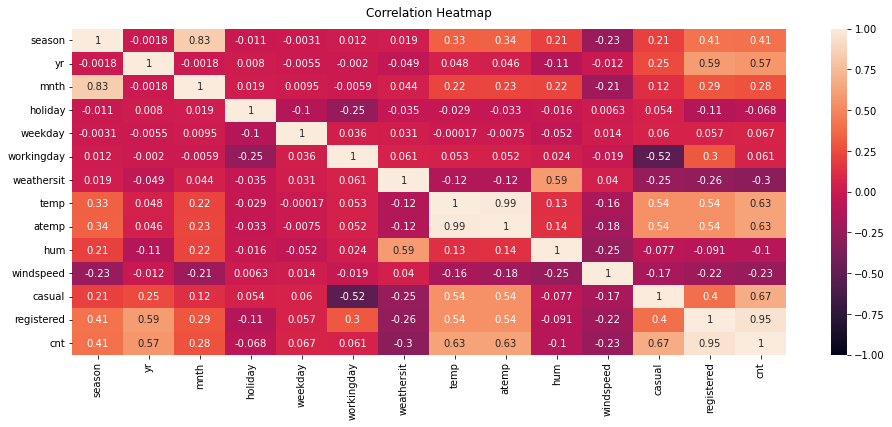

In [29]:
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# DATA PREPROCESSING

In [30]:
data_day = df1[['cnt']]
data_day

cnt
dteday          
2011-01-01   985
2011-01-02   801
2011-01-03  1349
2011-01-04  1562
2011-01-05  1600
...          ...
2012-12-27  2114
2012-12-28  3095
2012-12-29  1341
2012-12-30  1796
2012-12-31  2729

[731 rows x 1 columns]

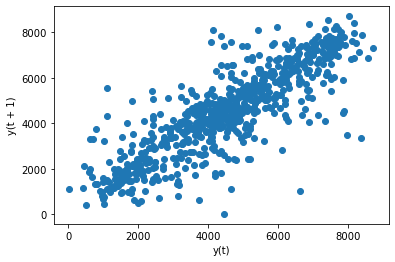

In [31]:
##First check if there is auto correlation
#The plot shows that there is strong autocorrelation
from pandas.plotting import lag_plot
lag_plot(data_day['cnt']);

# Test for Stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller
# define a function to determine the stationarity of the time series
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

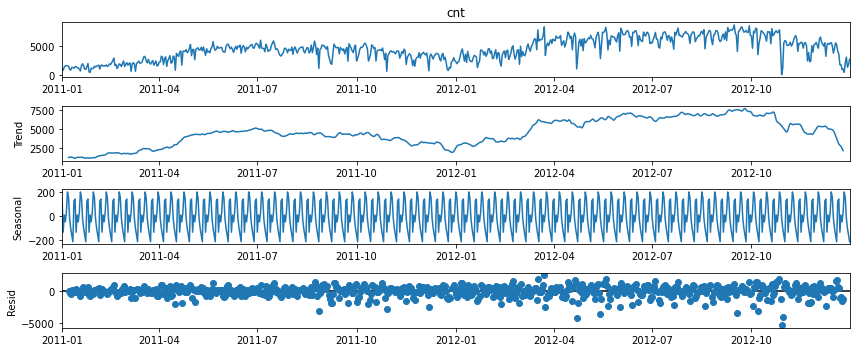

In [33]:
# Decompose the time series into trend, seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
data_decomp = seasonal_decompose(data_day['cnt'], period =12)
data_decomp.plot();

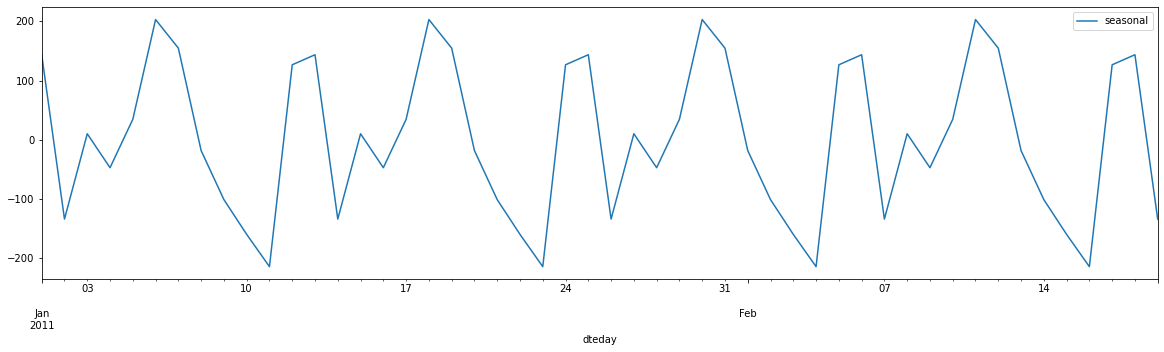

In [34]:
# more detailed seasonal component
data_decomp.seasonal.iloc[0:50].plot(figsize=(20,5),legend =True);


In [35]:
# test for stationarity
adf_test(df1['cnt'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.877448
p-value                   0.342743
# lags used              13.000000
# observations          717.000000
critical value (1%)      -3.439503
critical value (5%)      -2.865579
critical value (10%)     -2.568921
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [36]:
#perform first order difference
from statsmodels.tsa.statespace.tools import diff
data_day['Demand First Difference'] = diff(data_day['cnt'],k_diff =1)
data_day

cnt  Demand First Difference
dteday                                   
2011-01-01   985                      NaN
2011-01-02   801                   -184.0
2011-01-03  1349                    548.0
2011-01-04  1562                    213.0
2011-01-05  1600                     38.0
...          ...                      ...
2012-12-27  2114                   1673.0
2012-12-28  3095                    981.0
2012-12-29  1341                  -1754.0
2012-12-30  1796                    455.0
2012-12-31  2729                    933.0

[731 rows x 2 columns]

In [37]:
#perform stationarity test again to see if the data is stationary
adf_test(data_day['Demand First Difference'].dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.177881e+01
p-value                 1.046780e-21
# lags used             1.200000e+01
# observations          7.170000e+02
critical value (1%)    -3.439503e+00
critical value (5%)    -2.865579e+00
critical value (10%)   -2.568921e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


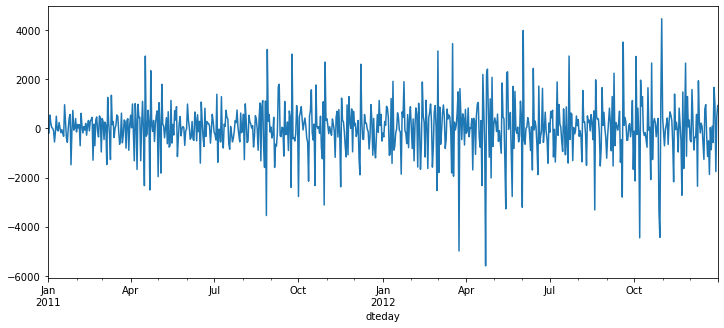

In [38]:
data_day['Demand First Difference'].plot();

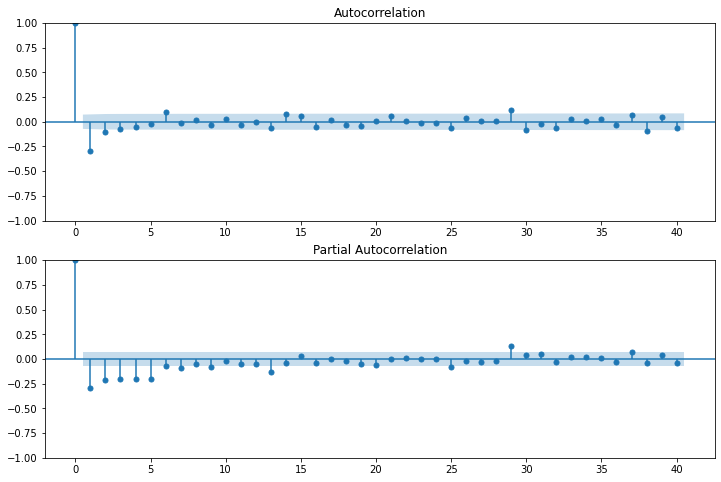

In [39]:
# plot the acf and pacf to determine the lags
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_day['Demand First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_day['Demand First Difference'].dropna(),lags=40,ax=ax2)

# Split the Data

In [40]:
#Split the data into test set and train set
train_data =data_day['cnt'].iloc[0:585]
test_data = data_day['cnt'].iloc[585:]
test_data

dteday
2012-08-08    7534
2012-08-09    7286
2012-08-10    5786
2012-08-11    6299
2012-08-12    6544
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 146, dtype: int64

In [41]:
start = len(train_data)
start

585

In [42]:
end = len(train_data)+len(test_data)-1
end

730

In [62]:
# Use auto_arima to determine the orders
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
auto_arima(data_day['cnt'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6022.010
Date:                Thu, 29 Dec 2022   AIC                          12050.020
Time:                        15:01:55   BIC                          12063.800
Sample:                    01-01-2011   HQIC                         12055.337
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3587      0.035     10.115      0.000       0.289       0.428
ma.L1         -0.8898      0.021    -42.792      0.000      -0.931      -0.849
sigma2      8.556e+05   2.43e+04     35.227      0.000    8.08e+05    9.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1141.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.02   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_day['cnt'],order=(1, 1, 1))
results=model.fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    cnt   No. Observations:                  731
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6022.010
Date:                Thu, 29 Dec 2022   AIC                          12050.020
Time:                        15:02:02   BIC                          12063.800
Sample:                    01-01-2011   HQIC                         12055.337
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3587      0.035     10.115      0.000       0.289       0.428
ma.L1         -0.8898      0.021    -42.792      0.000      -0.931      -0.849
sigma2      8.556e+05   2.43e+04     35.227      0.000    8.08e+05    9.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1141.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.02   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
#Use the model to make prediction
predictions1=results.predict(start=start, end=end).rename('SARIMAX(1, 1, 1)Predictions')
predictions1

2012-08-08    7029.750230
2012-08-09    7178.944252
2012-08-10    7101.773197
2012-08-11    6418.679404
2012-08-12    6589.525498
                 ...     
2012-12-27    2073.204255
2012-12-28    2677.871103
2012-12-29    3075.757949
2012-12-30    2255.376608
2012-12-31    2367.984787
Freq: D, Name: SARIMAX(1, 1, 1)Predictions, Length: 146, dtype: float64

In [66]:
test_data

dteday
2012-08-08    7534
2012-08-09    7286
2012-08-10    5786
2012-08-11    6299
2012-08-12    6544
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 146, dtype: int64

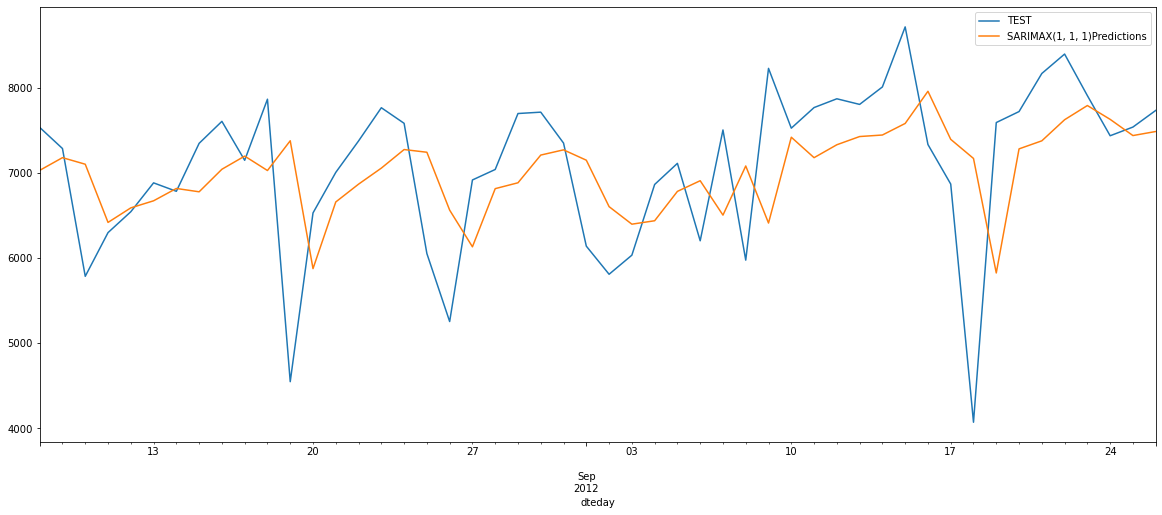

In [67]:
#train['cnt'].plot(legend=True,label='TRAIN')
test_data.iloc[0:50].plot(legend=True,label='TEST',figsize=(20,8))
predictions1.iloc[0:50].plot(legend=True);

In [68]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test_data[i]}")

predicted=7029.75023 , expected=7534
predicted=7178.944252, expected=7286
predicted=7101.773197, expected=5786
predicted=6418.679404, expected=6299
predicted=6589.525498, expected=6544
predicted=6672.400311, expected=6883
predicted=6817.218924, expected=6784
predicted=6778.043318, expected=7347
predicted=7042.706754, expected=7605
predicted=7197.220329, expected=7148
predicted=7027.85271 , expected=7865
predicted=7377.313812, expected=4549
predicted=5876.082795, expected=6530
predicted=6658.800932, expected=7006
predicted=6867.818685, expected=7375
predicted=7056.079624, expected=7765
predicted=7274.103591, expected=7582
predicted=7242.381119, expected=6053
predicted=6562.810933, expected=5255
predicted=6132.429796, expected=6917
predicted=6815.106522, expected=7040
predicted=6884.012374, expected=7697
predicted=7209.286954, expected=7713
predicted=7270.530597, expected=7350
predicted=7149.064751, expected=6140
predicted=6603.801484, expected=5810
predicted=6397.948908, expected=6034
p

In [69]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_data, predictions1)
print(f'SARIMAX(1, 1, 1) MSE Error: {error:11.10}')

SARIMAX(1, 1, 1) MSE Error: 1401264.259


In [70]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test_data, predictions1)
print(f'SARIMAX(1, 1, 1) RMSE Error: {error:11.10}')

SARIMAX(1, 1, 1) RMSE Error: 1183.750083


In [71]:
forecast =results.predict(start=len(data_day),end=len(data_day)+90,dynamic =True).rename('SARIMAX(1, 1, 1)Forecast')
forecast

2013-01-01    2742.468996
2013-01-02    2747.300860
2013-01-03    2749.034241
2013-01-04    2749.656074
2013-01-05    2749.879151
                 ...     
2013-03-28    2750.003946
2013-03-29    2750.003946
2013-03-30    2750.003946
2013-03-31    2750.003946
2013-04-01    2750.003946
Freq: D, Name: SARIMAX(1, 1, 1)Forecast, Length: 91, dtype: float64

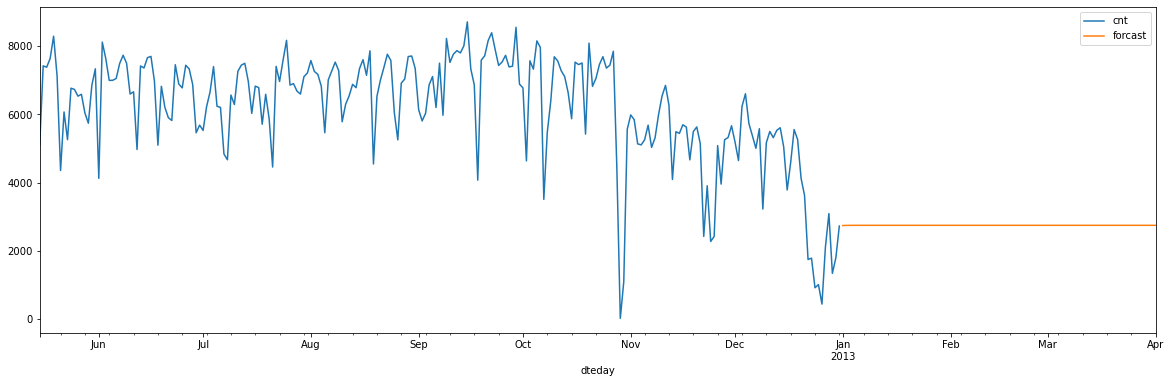

In [72]:
# Plot the results
data_day['cnt'].iloc[500:].plot(legend=True)
forecast.plot(legend=True,figsize=(20,6),label ='forcast');